##**Домашнее задание по теме "Классификация: Логистическая регрессия и SVM"**

**Задание:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи модели логистической регрессии и модели опорных векторов.

Этапы работы:

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

Проведите первичный анализ:
a) проверьте данные на пропуски. Удалите в случае обнаружения.
* Предложите альтернативный способ работы с пропусками
b) постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
c) преобразуйте категориальные признаки

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Сформулируйте выводы по проделанной работе:
a) кратко опишите какие преобразования были сделаны с данными.
b) cравните точность двух моделей.
c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
* Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для получение зачёта по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.

**Решение:**

### 1. Загрузка данных и первичный анализ:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Загрузка данных
data = pd.read_csv('adult.csv')

In [ ]:
# Первичный анализ данных
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Описание базы данных:

Числовые признаки:

1. Возраст (age)
2. Весовой коэффициент семьи (fnlwgt) - это числовое значение, представляющее средний вес семьи для определения, насколько репрезентативна выборка в обследовании.
3. Прибыль от капитала (capital-gain) - это числовое значение, представляющее прибыль, полученную от продажи активов.
4. Потери капитала (capital-loss) - это числовое значение, представляющее убытки, понесенные от продажи активов.
5. Количество рабочих часов в неделю (hours-per-week) - это количество рабочих часов в неделю.

Категориальные признаки:

1. Класс работы (workclass) - тип занятости: частный сектор, государственный сектор и самозанятость.
2. Уровень образования (education) - уровень образования, начиная от школы до докторской степени.
3. Количество лет образования (educational-num) - это числовое значение, представляющее количество лет образования, завершенных человеком.
4. Семейное положение (marital-status) - статус отношений человека: женат/замужем, никогда не был в браке,  в гражданском браке, вдовец или разведен.
5. Род занятий (occupation) - это категориальное значение, описывающее профессию или специализацию человека.
6. Отношение к респонденту (relationship) - это категориальное значение, указывающее на семейное положение, например, жена, собственный ребенок и т. д.
7. Раса (race) - принадлежность к определенной расовой группе.
8. Пол (gender) - мужской или женский пол.
9. Страна рождения (native-country) - это категориальное значение, указывающее на страну, в которой человек родился.
10. Целевая переменная – уровень дохода (income), который принимает два значения <=50K и >50K.



### 2. Проверка наличия пропусков и обработка:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Вывод: пропусков данных в датасете нет.

In [ ]:
#Посмотрим уникальные значения в столбцах типа object.
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()     # Получение уникальных значений в столбце
    print(f"Уникальные значения в столбце '{column}': {unique_values}\n")


Уникальные значения в столбце 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Уникальные значения в столбце 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Уникальные значения в столбце 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Уникальные значения в столбце 'occupation': ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Уникальные значения в столбце 'relationship': ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Уникальные значения в столбце 'race': ['Black' '

Вывод:

В трех столбцах есть некачественно заполненные данные: 'workclass', 'occupation', 'native-country',  где вместо данных внесен '?'.


In [ ]:
# Заменим пропуски на NaN
data.replace('?', np.nan, inplace=True)

In [ ]:
# Оценим пропуски
data.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
# Удалим строки с пропущенными значениями
data.dropna(inplace=True)

In [ ]:
# Оценим, сколько данных осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Вывод: остались только обработанные данные. Заполнять пропуски в столбцах: workclass', 'occupation', 'native-country'  на основе имеющихся данных, например, модальным значением, я бы не стала, поскольку это персональные данные. И предсказывать на основе среднего тип занятости или ,например,  страну происхождения - неуместно.

### 3. Визуализация и анализ данных:

Посмотрим статистики

In [ ]:
# Разделим датасет на две группы
income_below_50k = data[data['income'] == '<=50K']
income_above_50k = data[data['income'] == '>50K']

# Статистики для дохода <=50K
stats_below_50k = income_below_50k.describe()

# Статистики для дохода >50K
stats_above_50k = income_above_50k.describe()

In [ ]:
# Выведем по ним статистики
stats_below_50k

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,34014.000000,3.401400e+04,34014.000000,34014.000000,34014.000000,34014.000000
mean,36.749427,1.901752e+05,9.630770,149.023402,54.032428,39.372023
std,13.564683,1.066537e+05,2.420402,927.447387,312.220461,11.974127
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,26.000000,1.169680e+05,9.000000,0.000000,0.000000,37.000000
50%,34.000000,1.789525e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.394048e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,99.000000


In [ ]:
stats_above_50k

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,11208.000000,1.120800e+04,11208.000000,11208.000000,11208.000000,11208.000000
mean,44.006067,1.883980e+05,11.598501,3991.791667,193.487063,45.690489
std,10.340502,1.024921e+05,2.367451,14616.543746,592.642319,10.797764
min,19.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,36.000000,1.188590e+05,10.000000,0.000000,0.000000,40.000000
50%,43.000000,1.767755e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.335110e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


Выводы:

1. Возраст (Age):
   - Для группы с доходом <=50K: средний возраст равен примерно 36.75 лет, для группы >50K - примерно 44.01 год. Это говорит о том, что с возрастом доход, как правило, растет.

2. Образование (Educational-num):
   - Для группы с доходом <=50K среднее значение образовательного уровня равно примерно 9.63, а для группы >50K - 11.60. Это указывает на то, что более высокий уровень дохода имеют лица с более высоким уровнем образования.

3. Капиталовложения (Capital-gain и Capital-loss):
   - Для группы с доходом >50K среднее значение и заработанного капитала (capital-gain), и капитала потерь (capital-loss) гораздо выше, чем для группы <=50K. Это логично и связано с бОльшим объемом инвестиций в данной группе на фоне наличия у ее представителей большего количества свободных денежных средств для инвестирования.

4. Часы работы в неделю (Hours-per-week):
   - Для группы с доходом >50K среднее количество отработанных часов в неделю (45.69) превышает среднее для группы <=50K (39.37). Это отражает тот  факт, что чтобы больше зарабатывать, нужно больше времени уделять работе.




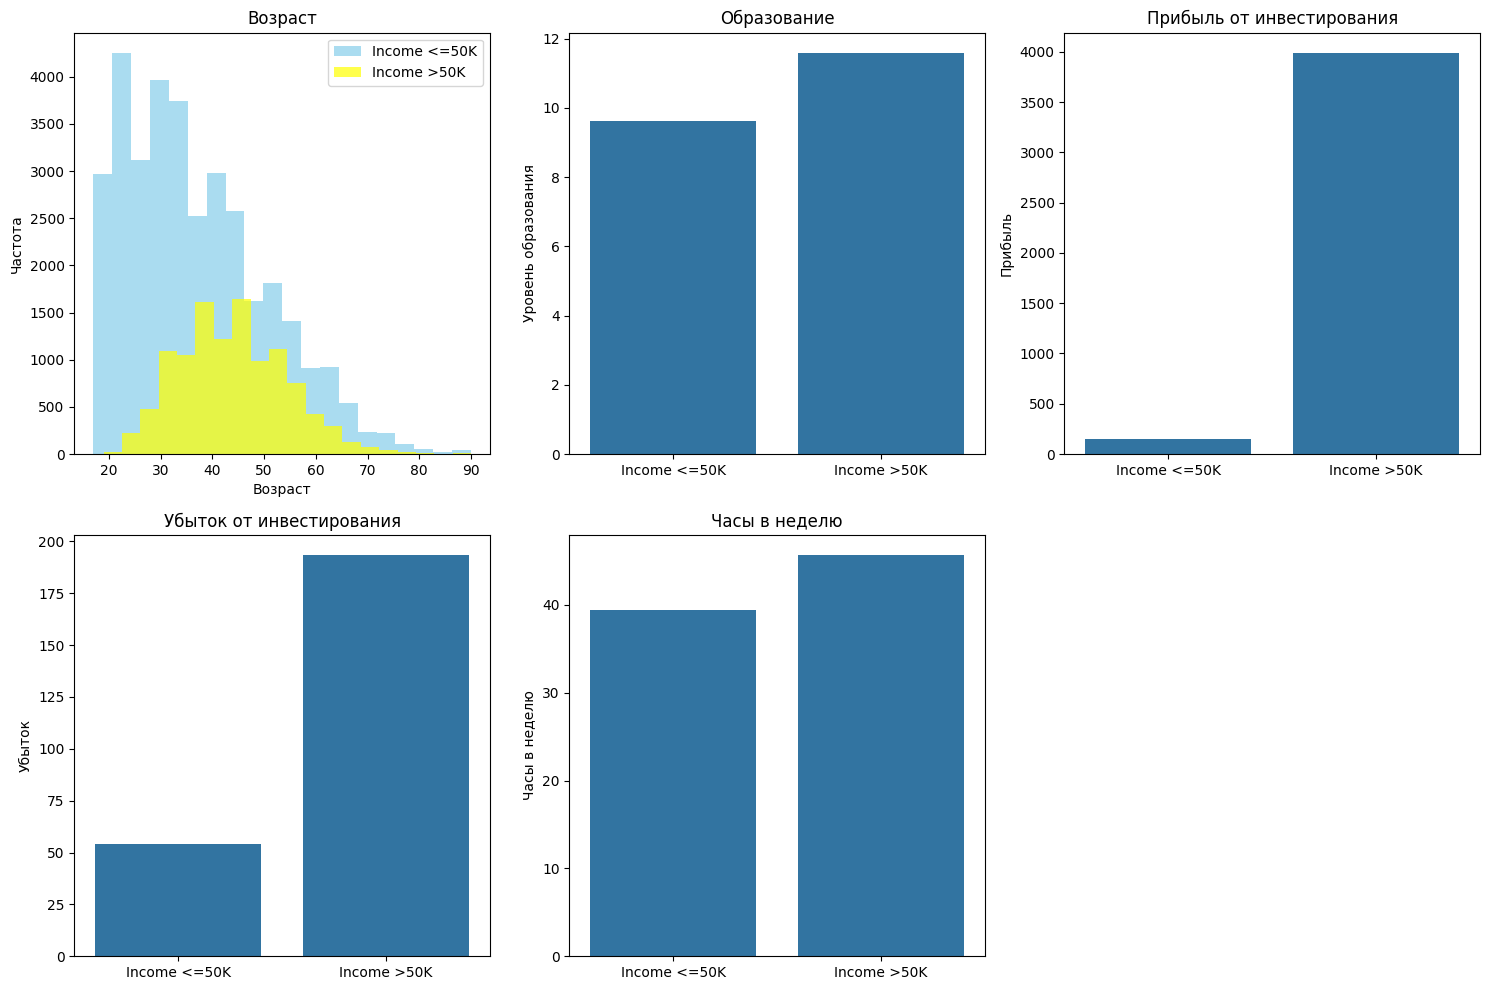

In [ ]:
# Визуализируем:
# Создаем новую фигуру и оси
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Гистограмма для возраста
axes[0, 0].hist(income_below_50k['age'], bins=20, color='skyblue', alpha=0.7, label='Income <=50K')
axes[0, 0].hist(income_above_50k['age'], bins=20, color='yellow', alpha=0.7, label='Income >50K')
axes[0, 0].set_title('Возраст')
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].legend()

# График различий для уровня образования
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['educational-num'].mean(), income_above_50k['educational-num'].mean()], ax=axes[0, 1])
axes[0, 1].set_title('Образование')
axes[0, 1].set_ylabel('Уровень образования')

# График различий для капиталовложений
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['capital-gain'].mean(), income_above_50k['capital-gain'].mean()], ax=axes[0, 2])
axes[0, 2].set_title('Прибыль от инвестирования')
axes[0, 2].set_ylabel('Прибыль')

# График различий для убытков
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['capital-loss'].mean(), income_above_50k['capital-loss'].mean()], ax=axes[1, 0])
axes[1, 0].set_title('Убыток от инвестирования')
axes[1, 0].set_ylabel('Убыток')

# График различий для часов в неделю
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['hours-per-week'].mean(), income_above_50k['hours-per-week'].mean()], ax=axes[1, 1])
axes[1, 1].set_title('Часы в неделю')
axes[1, 1].set_ylabel('Часы в неделю')

# Убираем пустое окно
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Для определения, являются ли данные различия в признаках для  двух групп статистически значимыми, воспользуемся t-критерием Стьюдента.

In [ ]:
# Создадим список признаков
features = ['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in features:
    t_stat, p_value = stats.ttest_ind(income_below_50k[feature], income_above_50k[feature])

    if p_value < 0.05:
        print(f"Существуют статистически значимые различия в среднем значении {feature} между группами Income <=50K и Income >50K")
    else:
        print(f"Нет статистически значимых различий в среднем значении {feature} между группами Income <=50K и Income >50K")
    print()

Существуют статистически значимые различия в среднем значении educational-num между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении capital-gain между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении capital-loss между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении hours-per-week между группами Income <=50K и Income >50K



Посмотрим есть ли корреляция между признаками.

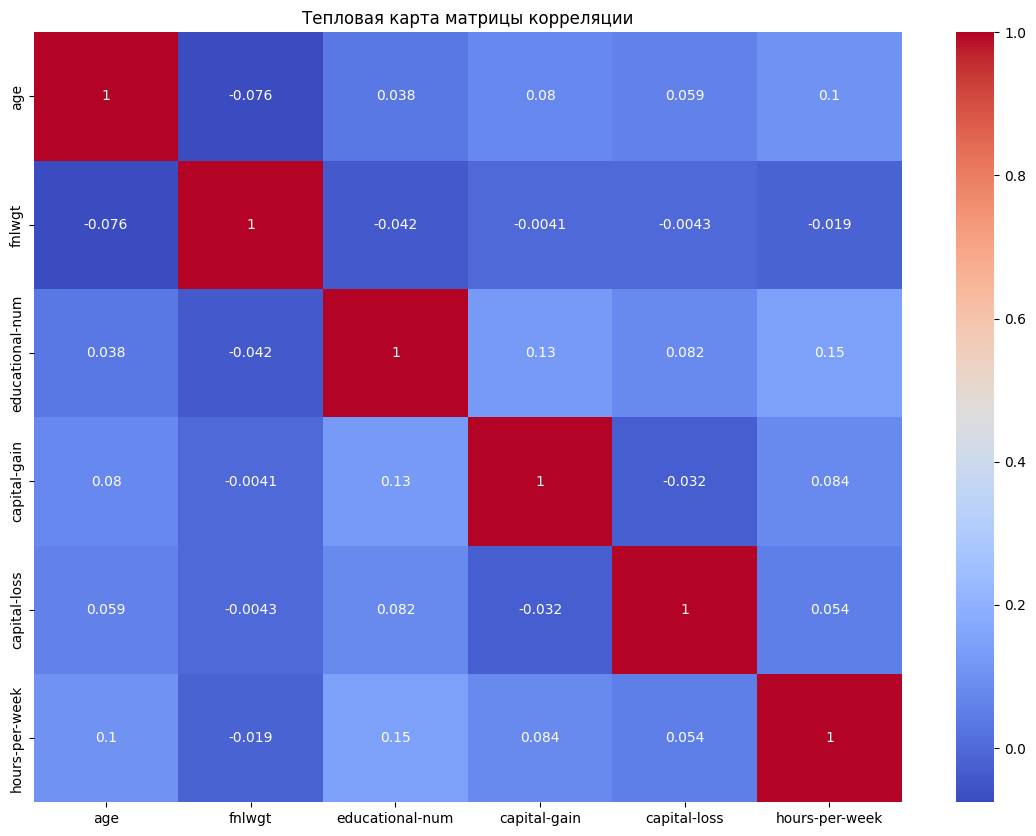

In [ ]:
# Выберем числовые признаки
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Вычисим матрицу корреляции
correlation_matrix = numeric_features.corr()

# Визуализируем
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', )
plt.title('Тепловая карта матрицы корреляции')
plt.show()

Выводы:

Положительная корреляция  наблюдается между признаками: возраст (age) и количество отработанных часов в неделю (hours-per-week), возраст (age) и уровень образования (educational-num), уровень образования (educational-num) и  доход от капитала (capital-gain).
Это может означать, что чем старше человек, тем вероятнее, что он будет работать больше часов, будет иметь более высокий уровень образования и будет распологать бОльшими средствами для инвестирования.


### 4. Преобразование категориальных признаков:

In [ ]:
# Преобразование категориальных признаков в числовые с помощью One-Hot Encoding
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)


### 5. Разделение выборки на обучающее и тестовое подмножество:

In [ ]:
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
8605,29,263786,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
28547,39,99270,13,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
33927,41,237452,13,0,0,15,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
14437,21,109199,10,0,0,15,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
41839,58,206532,9,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,39,497525,6,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48310,36,114719,14,0,0,50,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41203,53,38795,5,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
930,57,186361,11,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### 6. Обучение моделей логистической регрессии и метода опорных векторов:

In [ ]:
# Обучение модели логистической регрессии
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Обучение модели метода опорных векторов
svm = SVC()
svm.fit(X_train, y_train)

# Предсказание на тестовом наборе для обеих моделей
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

### 7. Оценка точности моделей на тестовом множестве:

In [ ]:
# Оценка точности моделей
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_lr))
print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))


Accuracy of Logistic Regression model: 0.7954671088999448
Accuracy of SVM model: 0.7948037589828635


Точность модели логистической регрессии составляет 0.7955, в то время как точность модели SVM равна 0.7948. Это означает, что модель логистической регрессии показала чуть выше точность прогнозирования на тестовом наборе данных по сравнению с моделью SVM.

### Попробуем обучить модель с Масштабированными данными (StandartScaler) - для признаков с непрерывными значениями

In [ ]:
continuous_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()

X_train_continuous = X_train[continuous_columns]
X_test_continuous = X_test[continuous_columns]

scaler.fit(X_train_continuous)
X_train_continuous_scaled = scaler.transform(X_train_continuous)
X_test_continuous_scaled = scaler.transform(X_test_continuous)

In [ ]:
# Объединим преобразованные непрерывные признаки с категориальными с использованием np.concatenate
X_train_scaled = np.concatenate([X_train_continuous_scaled, X_train.drop(continuous_columns, axis=1)], axis=1)
X_test_scaled = np.concatenate([X_test_continuous_scaled, X_test.drop(continuous_columns, axis=1)], axis=1)

In [ ]:
# Обучение модели логистической регрессии с увеличенным числом итераций
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Обучение модели метода опорных векторов
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе для обеих моделей
y_pred_lr = lr.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Оценка точности моделей
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_lr))
print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))

Accuracy of Logistic Regression model: 0.8518518518518519
Accuracy of SVM model: 0.8593698175787728


Исходя из результатов, можно сделать вывод, что после масштабирования непрерывных признаков обе модели показали улучшение производительности. При этом модель SVM показала лучшую точность прогнозирования на тестовом наборе данных. Для принятия окончательного решения требуется дополнительное исследование.
